In [6]:
# Example of PyTorch library
import torch
# declare two symbolic floating-point scalars
a = torch.tensor(1.5)
b = torch.tensor(2.5)
# create a simple symbolic expression using the add function
c = torch.add(a, b)
print(c)

tensor(4.)


In [7]:
import torch.nn as nn

model = nn.Sequential(
  nn.Linear(8, 12),
  nn.ReLU(),
  nn.Linear(12, 8),
  nn.ReLU(),
  nn.Linear(8, 1),
  nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


Files already downloaded and verified
Files already downloaded and verified


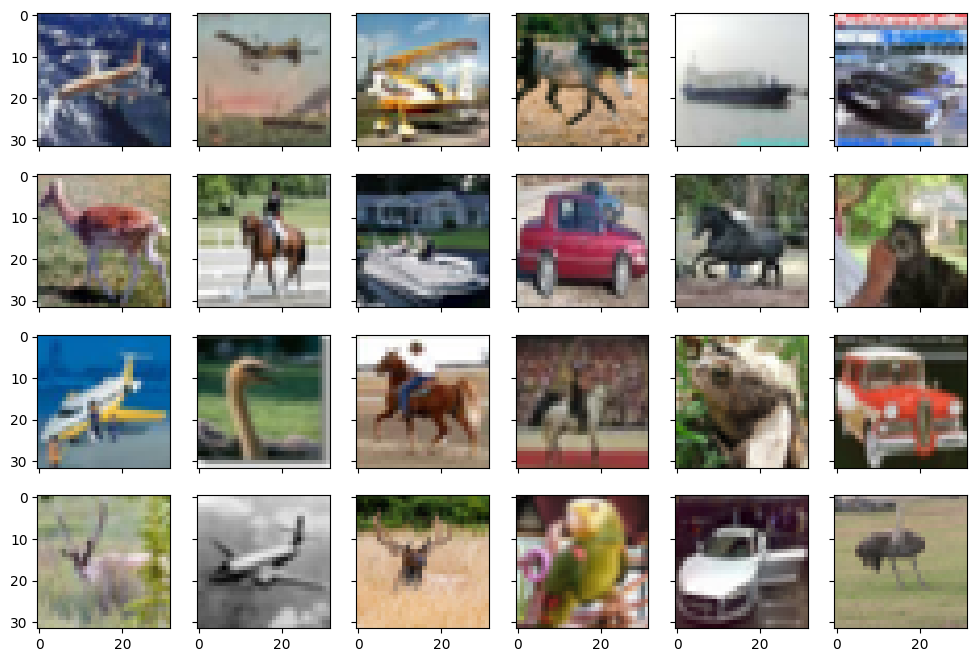

In [8]:
import matplotlib.pyplot as plt
import torchvision
import torch
from torchvision.datasets import CIFAR10

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 24
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))
for images, labels in trainloader:
    for i in range(batch_size):
        row, col = i//6, i%6
        ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
    break  # take only the first batch
plt.show()

Files already downloaded and verified
Files already downloaded and verified


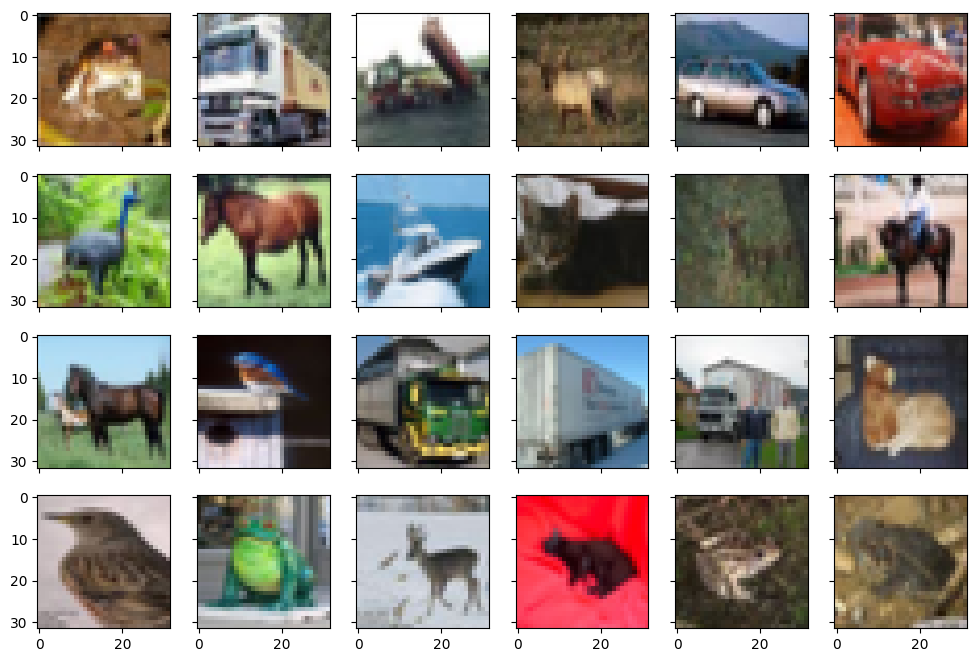

In [9]:
# Loading Data from Torchvision

import matplotlib.pyplot as plt
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))
for i in range(0, 24):
    row, col = i//6, i%6
    ax[row][col].imshow(trainset.data[i])
plt.show()

Files already downloaded and verified
Files already downloaded and verified


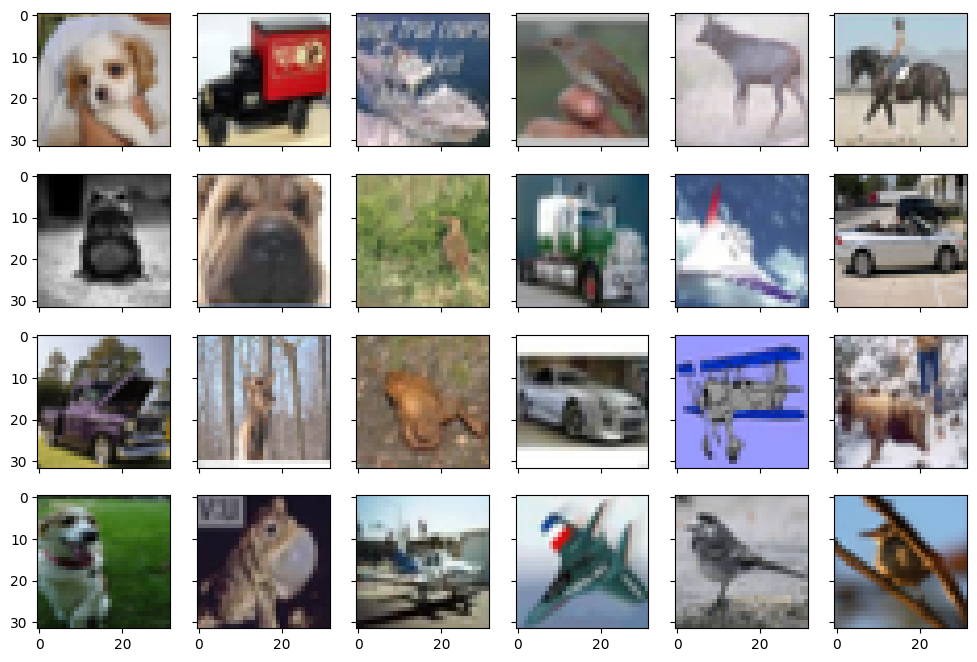

In [10]:
# Using PyTorch DataLoader

import matplotlib.pyplot as plt
import torchvision
import torch
from torchvision.datasets import CIFAR10

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 24
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12,8))
for images, labels in trainloader:
    for i in range(batch_size):
        row, col = i//6, i%6
        ax[row][col].imshow(images[i].numpy().transpose([1,2,0]))
    break  # take only the first batch
plt.show()

In [14]:
# Convolutional Neural Network

import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Conv2d(32, 32, kernel_size=(3,3), stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2)),
    nn.Flatten(),
    nn.Linear(8192, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)
print(model)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=8192, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
# Train an Image Classifier

import torch.nn as nn
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_pred = model(inputs)
            acc += (torch.argmax(y_pred, 1) == labels).float().sum()
            count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))


In [ ]:
# Train with GPU


import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs = 20
for epoch in range(n_epochs):
    model.train()
    for inputs, labels in trainloader:
        y_pred = model(inputs.to(device))
        loss = loss_fn(y_pred, labels.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_pred = model(inputs.to(device))
            acc += (torch.argmax(y_pred, 1) == labels.to(device)).float().sum()
            count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))